# Importing Libraries

In [1]:
# libraries for automating the data analysis process

import os 
import io 
from glob import glob

# libraries for data analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Defining Folder Variables

In [2]:
# Set relative paths for different folders
MAIN_FOLDER = os.path.abspath(os.path.join(os.getcwd(), ".."))

CODE_FOLDER = os.path.join(MAIN_FOLDER, "Code")

PROFILE_FOLDER = os.path.join(CODE_FOLDER, "ProfileReports")

DATA_FOLDER = os.path.join(MAIN_FOLDER, "Data")

RAW_SHEETS_FOLDER = os.path.join(DATA_FOLDER, "Raw_Sheets")

CLEANED_SHEETS_FOLDER = os.path.join(DATA_FOLDER, "Cleaned_Sheets")


# Defining Sheet Variable

In [3]:
SAVE_TO_CSV = os.path.join(CLEANED_SHEETS_FOLDER, "cleaned_sheet.csv")

# Importing Data

In [4]:
final_df = pd.read_csv(SAVE_TO_CSV)

final_df.head(-10)

,OrderNumber,CUSTID,JOBTYPE,Department,FROMLOCSTR,TOLOCSTR,STARTTM,ENDTM,TripDuration,CTCOMPLETEDT,DriverId,PrimeMoverId,TrailerId,JOINED DATE,RESIGNED DATE,RACE,Team,Status,AGE_Years,Seniority
0,TL9008453,00-RE001,LOCAL,CHIEN,JI DRUM,1 SERAYA AVE,2021-01-07 08:00:00,2021-01-07 08:30:00,0.5,2021-01-07,2,215,1538.0,2007-06-07,2021-02-23,CHINESE,CHIEN LI,16.0,53.58,13.72
1,TL9008453,00-RE001,LOCAL,CHIEN,JI DRUM,1 SERAYA AVE,2021-01-07 10:30:00,2021-01-07 11:00:00,0.5,2021-01-07,2,215,972.0,2007-06-07,2021-02-23,CHINESE,CHIEN LI,16.0,53.58,13.72
2,TL9009105,00-RE001,LOCAL,CHIEN,JI DRUM,1 SERAYA AVE,2021-01-27 08:00:00,2021-01-27 08:30:00,0.5,2021-01-27,2,215,972.0,2007-06-07,2021-02-23,CHINESE,CHIEN LI,6.0,53.58,13.72
3,TL9009105,00-RE001,LOCAL,CHIEN,JI DRUM,1 SERAYA AVE,2021-01-27 10:30:00,2021-01-27 11:00:00,0.5,2021-01-27,2,215,1538.0,2007-06-07,2021-02-23,CHINESE,CHIEN LI,6.0,53.58,13.72
4,TL9008550,00-RE001,LOCAL,CHIEN,JI DRUM,1 SERAYA AVE,2021-01-11 08:00:00,2021-01-11 08:30:00,0.5,2021-01-11,2,215,1538.0,2007-06-07,2021-02-23,CHINESE,CHIEN LI,13.0,53.58,13.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081769,XI7007593,00-RE114,IMPORT,XINHUA,31GUL CR,14 PENJ RD,2023-12-12 08:30:00,2023-12-12 09:30:00,1.0,2023-12-12,169,296,1771.0,2007-12-01,2023-12-31,CHINESE,Team 1,13.0,55.33,16.08
1081770,XI7007593,00-RE114,IMPORT,XINHUA,14 PENJ RD,EKY2,2023-12-12 09:30:00,2023-12-12 10:00:00,0.5,2023-12-12,169,296,1771.0,2007-12-01,2023-12-31,CHINESE,Team 1,13.0,55.33,16.08
1081771,XI7007610,00-RE114,IMPORT,XINHUA,PSA/PPT,PTC ISL (G),2023-12-12 09:00:00,2023-12-12 10:00:00,1.0,2023-12-12,379,338,1499.0,2014-11-01,2023-12-31,MALAY,Team 1,9.0,55.08,9.16
1081772,XI7007610,00-RE114,IMPORT,XINHUA,PTC ISL (G),CWT47JLNBUROH,2023-12-13 11:00:00,2023-12-13 12:00:00,1.0,2023-12-13,356,336,1934.0,2012-08-24,2023-12-31,MALAY,Team 1,8.0,37.42,11.35


# Preparing dataset for Monthly Trend Analysis

In [5]:
# Grouping by date, ID, and JOBTYPE

trip_agg = final_df.groupby(['CTCOMPLETEDT', 'PrimeMoverId', 'JOBTYPE']).size().reset_index(name='NumTrips')

trip_agg['CTCOMPLETEDT'] = pd.to_datetime(trip_agg['CTCOMPLETEDT'])

# Adding Year_Month column from CTCOMPLETEDT

trip_agg['Month'] = trip_agg['CTCOMPLETEDT'].dt.month

trip_agg['Year'] = trip_agg['CTCOMPLETEDT'].dt.year

monthly_total_trips = trip_agg.groupby(['Year', 'Month', 'JOBTYPE'])['NumTrips'].sum().reset_index()

monthly_total_trips['Year_Month'] = monthly_total_trips['Year'].astype(str) + '-' + monthly_total_trips['Month'].astype(str)

# Visualising Data

In [6]:
monthly_total_trips.head()

,Year,Month,JOBTYPE,NumTrips,Year_Month
0,2021,1,EXPORT,22494,2021-1
1,2021,1,IMPORT,4753,2021-1
2,2021,1,LOCAL,9415,2021-1
3,2021,2,EXPORT,22070,2021-2
4,2021,2,IMPORT,4436,2021-2


C:\DBA_Test\Code\sutd_eda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\DBA_Test\Code\sutd_eda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\DBA_Test\Code\sutd_eda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\DBA_Test\Code\sutd_eda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a le

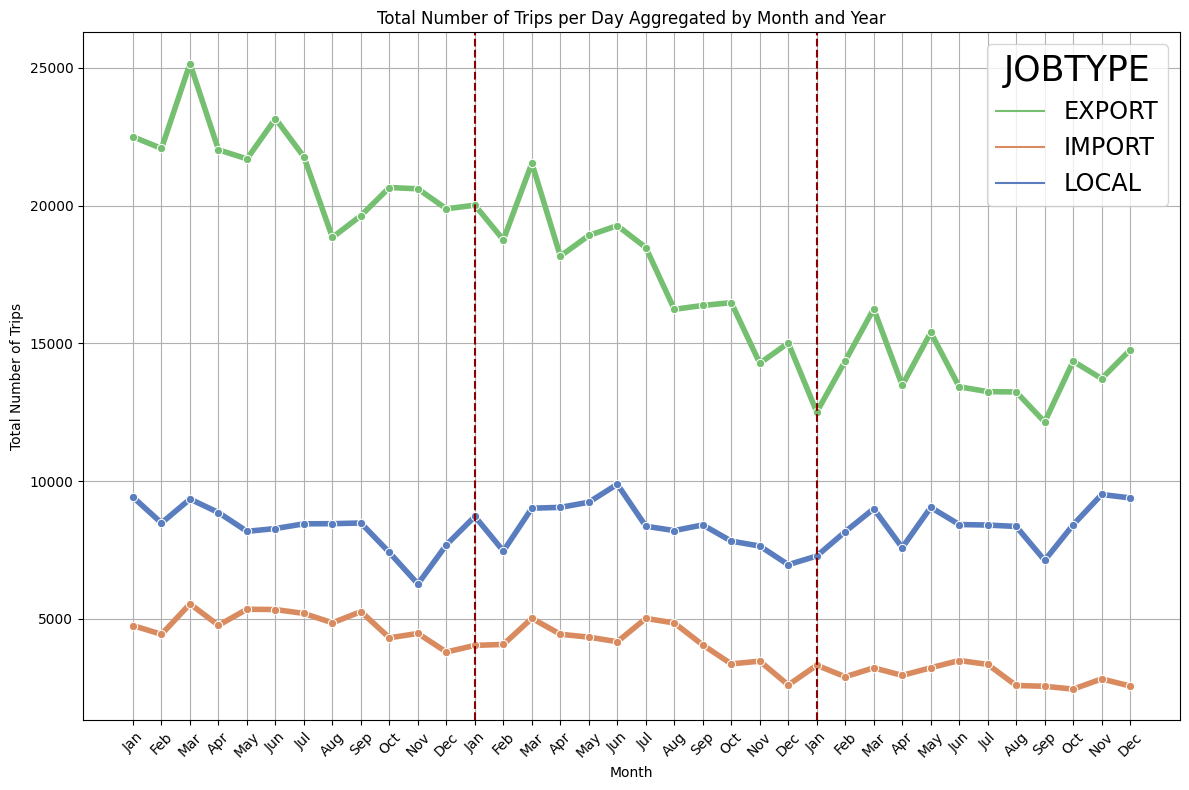

In [7]:
# visualising monthly_total_trips

plt.figure(figsize=(12, 8))
sns.lineplot(data=monthly_total_trips, x='Year_Month', y='NumTrips', hue='JOBTYPE', linewidth=4, marker='o', palette=['#75BF71','#D98B5F','#597DBF'])

plt.title('Total Number of Trips per Day Aggregated by Month and Year')
plt.xlabel('Month')
plt.ylabel('Total Number of Trips')
plt.xticks(ticks=np.arange(0, 36), labels=[calendar.month_abbr[i] for i in range(1, 13)] * 3, rotation=45)
plt.legend(title='JOBTYPE', fontsize='xx-large', title_fontsize='25')
plt.grid(True)
plt.axvline(x='2022-1', color='darkred', linestyle='--')
plt.axvline(x='2023-1', color='darkred', linestyle='--')
plt.tight_layout()
plt.show()

# Time Series Modelling

## Forecasting Exports for 2024

### Extracting Export data

In [8]:
df_monthly_exports = monthly_total_trips.groupby(['Year', 'Month', 'JOBTYPE']).sum().reset_index()

df_monthly_exports = df_monthly_exports[(df_monthly_exports['JOBTYPE'] == 'EXPORT')]

df_monthly_exports['NumTrips'] = pd.to_numeric(df_monthly_exports['NumTrips'])

df_monthly_exports.head()

,Year,Month,JOBTYPE,NumTrips,Year_Month
0,2021,1,EXPORT,22494,2021-1
3,2021,2,EXPORT,22070,2021-2
6,2021,3,EXPORT,25150,2021-3
9,2021,4,EXPORT,22022,2021-4
12,2021,5,EXPORT,21692,2021-5


### STL Decomposition

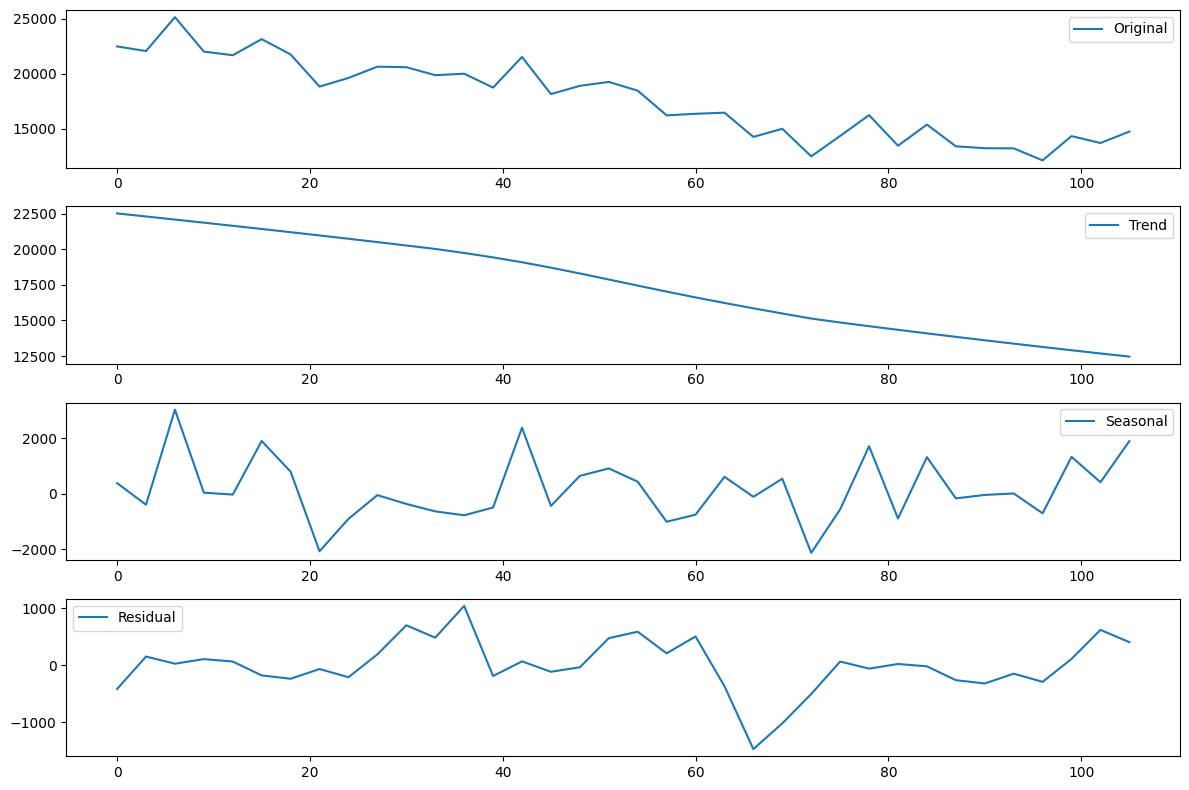

In [9]:
from statsmodels.tsa.seasonal import STL

# STL decomposition
stl = STL(df_monthly_exports['NumTrips'], period=12)  
result = stl.fit()

# Get decomposed components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Plot decomposed components
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df_monthly_exports['NumTrips'], label='Original')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()

We can see some seasonality in the export data. We will proceed with SARIMA for time series forecast methodology.

## SARIMA 

### Checking data for stationary property

A prerequisite for SARIMA modeeling is that the data must be stationary. As such, we begin checks using the Augmented Dickey- Fuller  (ADF) test

In [10]:
from statsmodels.tsa.stattools import adfuller
test_result = adfuller(df_monthly_exports['NumTrips'])
print(test_result)

(-1.0966753892663714, 0.7163958987843084, 1, 34, {'1%': -3.639224104416853, '5%': -2.9512301791166293, '10%': -2.614446989619377}, 434.5046904808364)


Alternatively, we create a function for the ADF test to interpret the test values

In [11]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(NumTrips):
    result=adfuller(NumTrips)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [12]:
adfuller_test(df_monthly_exports['NumTrips'])

ADF Test Statistic : -1.0966753892663714
p-value : 0.7163958987843084
#Lags Used : 1
Number of Observations Used : 34
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### Differencing

Apply differencing to obtain a stationary dataset. We start differencing from the lowest order and stop when ADF indicates stationarity. 

It is worthy to note that higher order differencing leads to larger data loss, we favour lower level differencing so as to preserve the already limited data.

In [13]:
df_monthly_exports['NumTrips First Difference'] = df_monthly_exports['NumTrips'] - df_monthly_exports['NumTrips'].shift(1)

In [14]:
df_monthly_exports['NumTrips'].shift(1)

0          NaN
3      22494.0
6      22070.0
9      25150.0
12     22022.0
15     21692.0
18     23154.0
21     21765.0
24     18842.0
27     19631.0
30     20653.0
33     20606.0
36     19880.0
39     20012.0
42     18753.0
45     21537.0
48     18163.0
51     18913.0
54     19269.0
57     18474.0
60     16232.0
63     16373.0
66     16473.0
69     14274.0
72     15011.0
75     12504.0
78     14361.0
81     16248.0
84     13473.0
87     15393.0
90     13420.0
93     13245.0
96     13233.0
99     12142.0
102    14347.0
105    13716.0
Name: NumTrips, dtype: float64

In [15]:
df_monthly_exports.head()

,Year,Month,JOBTYPE,NumTrips,Year_Month,NumTrips First Difference
0,2021,1,EXPORT,22494,2021-1,NaN
3,2021,2,EXPORT,22070,2021-2,-424.0
6,2021,3,EXPORT,25150,2021-3,3080.0
9,2021,4,EXPORT,22022,2021-4,-3128.0
12,2021,5,EXPORT,21692,2021-5,-330.0


In [16]:
## Again test dickey fuller test
adfuller_test(df_monthly_exports['NumTrips First Difference'].dropna())

ADF Test Statistic : -9.624538331254293
p-value : 1.6742819288219019e-16
#Lags Used : 0
Number of Observations Used : 34
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


Data is now stationary and we can stop differentiating. The previous steps in taking the first difference has lead to the loss of 1 data point. The sample size is now n = 35. 

Lets proceed to remove the invalid data to then obtain the clean dataset for SARIMA modelling.

In [17]:
df_monthly_exports_clean=df_monthly_exports.dropna()
df_monthly_exports_clean.head()

,Year,Month,JOBTYPE,NumTrips,Year_Month,NumTrips First Difference
3,2021,2,EXPORT,22070,2021-2,-424.0
6,2021,3,EXPORT,25150,2021-3,3080.0
9,2021,4,EXPORT,22022,2021-4,-3128.0
12,2021,5,EXPORT,21692,2021-5,-330.0
15,2021,6,EXPORT,23154,2021-6,1462.0


Note that we have dropped the 2023-01 datapoint as a result of first differencing

Consequently, our first confirmed SARIMA parameter is d = 1 

### SARIMA parameters

SARIMA parameters include (p,d,q,s)

p: order of AR model

d: integration order of the process 

q: order of MA model

s: seasonality

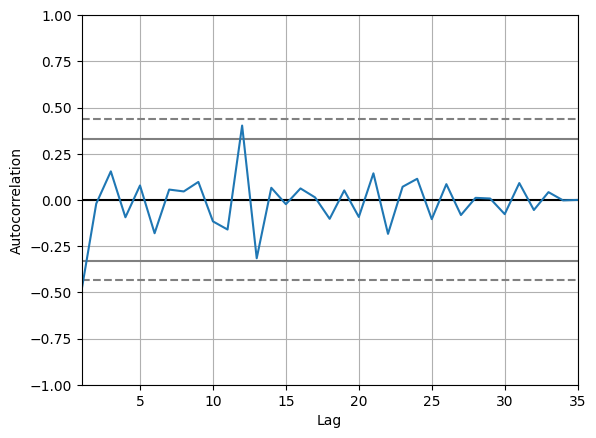

In [18]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_monthly_exports_clean['NumTrips First Difference'])
plt.show()

### Plotting ACF and PACF to obtain parameters p and q respectively

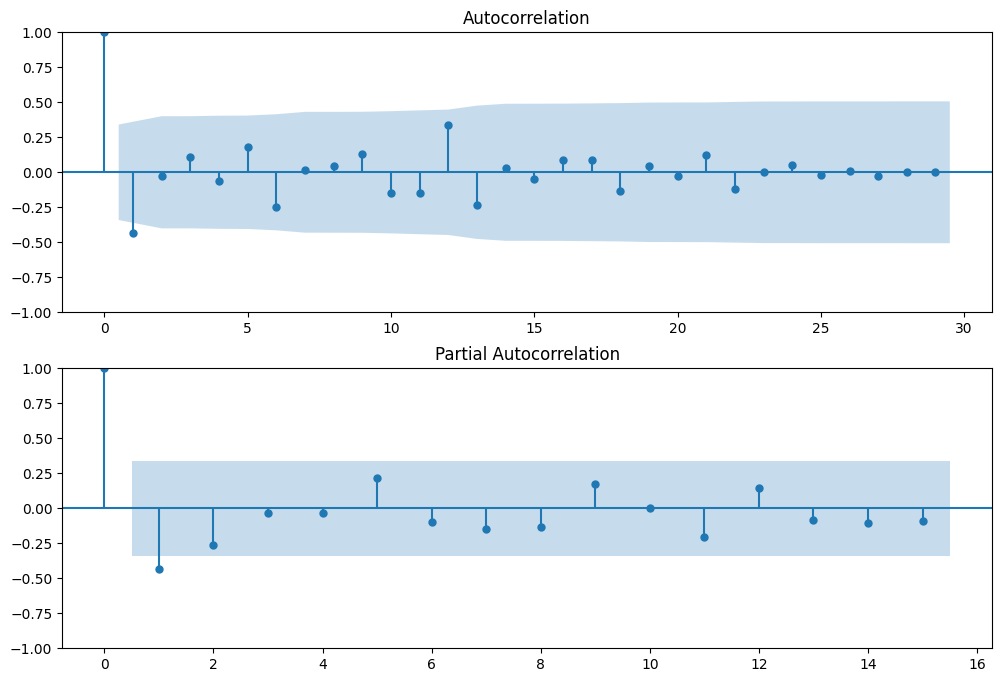

In [19]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_monthly_exports_clean['NumTrips First Difference'].iloc[2:],lags=29,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_monthly_exports_clean['NumTrips First Difference'].iloc[2:],lags=15,ax=ax2)

Autocorrelation Function (ACF) 
- provides the order of the Auto-Regressive model, AR(p)
- There is high degree of autocorrelation at lag 1, AR(1) we obtain p = 1

Partial Autocorrelation Function (PACF) 
- provides the order of the Moving Average model, MA(q)
- q can either be 0 or 1
- we can iterate values for q for a better model

Hence we can use an AR(1) model to model this process.

Due to current limited sample size, we will predict quarterly exports instead of annual exports. seasonality s = 4

Initial parameters are confirmed as p=1, d=1, q=0 or 1, s=4

### Splitting into Training and Testing Data (80|20 split)

As Time Series forecasting is contextual. We will split the dataset by its recency. 

The first 80% of the data will be used for training and more recent 20% data will be set aside for testing.

In [20]:
n_rows = len(df_monthly_exports_clean)
split_index = int(np.floor(0.8 * n_rows))  # use floor to ensure we get 80% of the data

# Split dataframe into train and test data
exports_train_data = df_monthly_exports_clean.iloc[:split_index]
exports_test_data = df_monthly_exports_clean.iloc[split_index:]

In [21]:
exports_train_data.head()

,Year,Month,JOBTYPE,NumTrips,Year_Month,NumTrips First Difference
3,2021,2,EXPORT,22070,2021-2,-424.0
6,2021,3,EXPORT,25150,2021-3,3080.0
9,2021,4,EXPORT,22022,2021-4,-3128.0
12,2021,5,EXPORT,21692,2021-5,-330.0
15,2021,6,EXPORT,23154,2021-6,1462.0


In [22]:
exports_test_data.head()

,Year,Month,JOBTYPE,NumTrips,Year_Month,NumTrips First Difference
87,2023,6,EXPORT,13420,2023-6,-1973.0
90,2023,7,EXPORT,13245,2023-7,-175.0
93,2023,8,EXPORT,13233,2023-8,-12.0
96,2023,9,EXPORT,12142,2023-9,-1091.0
99,2023,10,EXPORT,14347,2023-10,2205.0


In [23]:
df_monthly_exports_clean.head()

,Year,Month,JOBTYPE,NumTrips,Year_Month,NumTrips First Difference
3,2021,2,EXPORT,22070,2021-2,-424.0
6,2021,3,EXPORT,25150,2021-3,3080.0
9,2021,4,EXPORT,22022,2021-4,-3128.0
12,2021,5,EXPORT,21692,2021-5,-330.0
15,2021,6,EXPORT,23154,2021-6,1462.0


### Plotting the Forecast

C:\Users\micha\AppData\Local\Temp\ipykernel_29744\281500019.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exports_train_data['Year_Month'] = pd.to_datetime(exports_train_data['Year_Month'])
C:\Users\micha\AppData\Local\Temp\ipykernel_29744\281500019.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exports_test_data['Year_Month'] = pd.to_datetime(exports_test_data['Year_Month'])
C:\Users\micha\AppData\Local\Temp\ipykernel_29744\281500019.py:11: SettingWithCopyWarning: 
A value is trying to be set on

                                     SARIMAX Results                                     
Dep. Variable:                          NumTrips   No. Observations:                   28
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 4)   Log Likelihood                -212.262
Date:                           Tue, 16 Apr 2024   AIC                            430.523
Time:                                   16:10:48   BIC                            433.930
Sample:                               02-01-2021   HQIC                           431.380
                                    - 05-01-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0349      0.067     -0.520      0.603      -0.166       0.096
ar.S.L4       -0.1619      0.083     -1.945

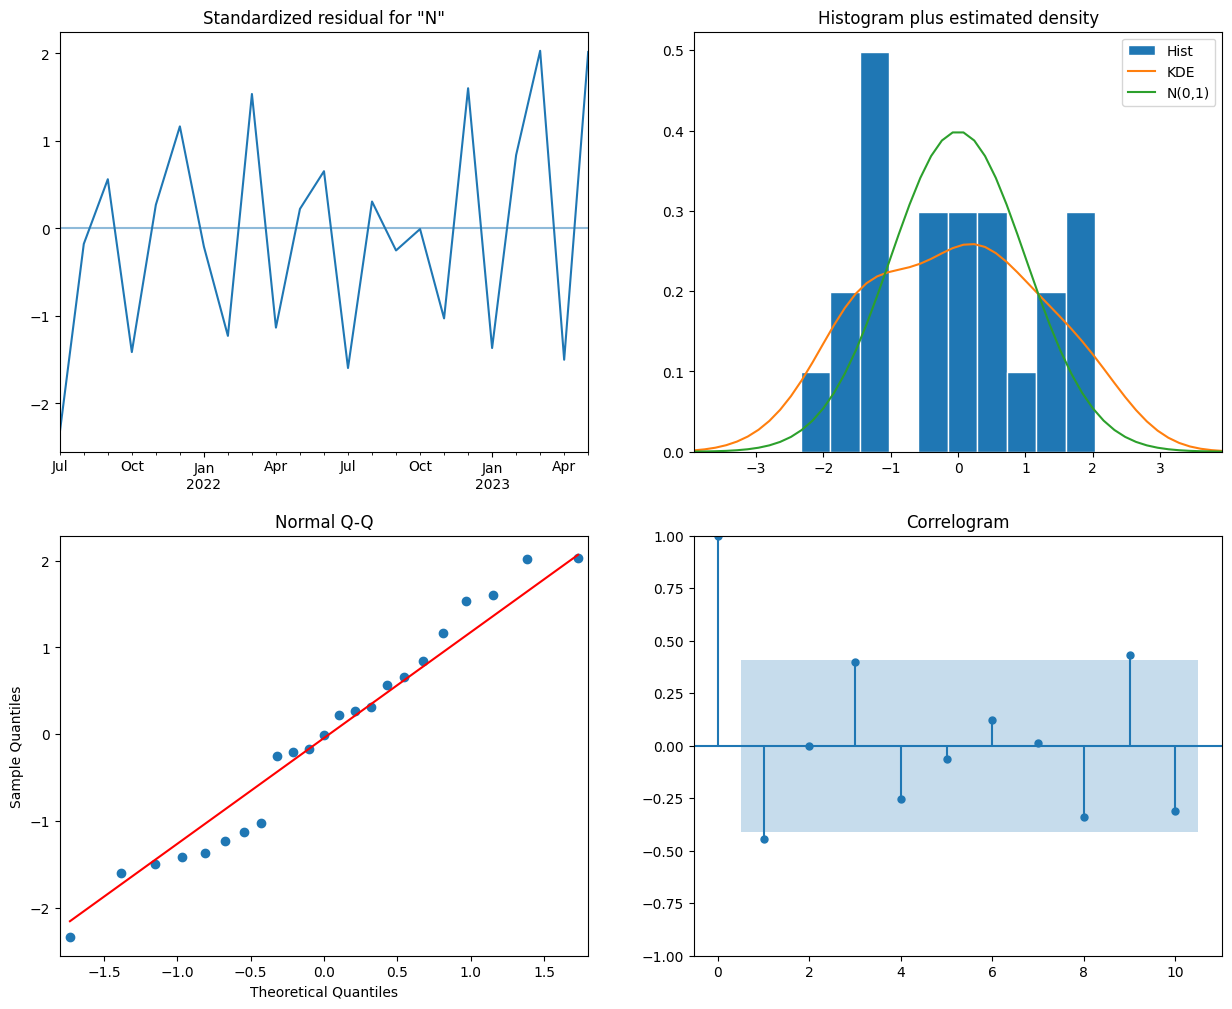

C:\Users\micha\AppData\Local\Temp\ipykernel_29744\281500019.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=exports_train_data.index[-1] + pd.DateOffset(months=1), periods=4, freq='M')


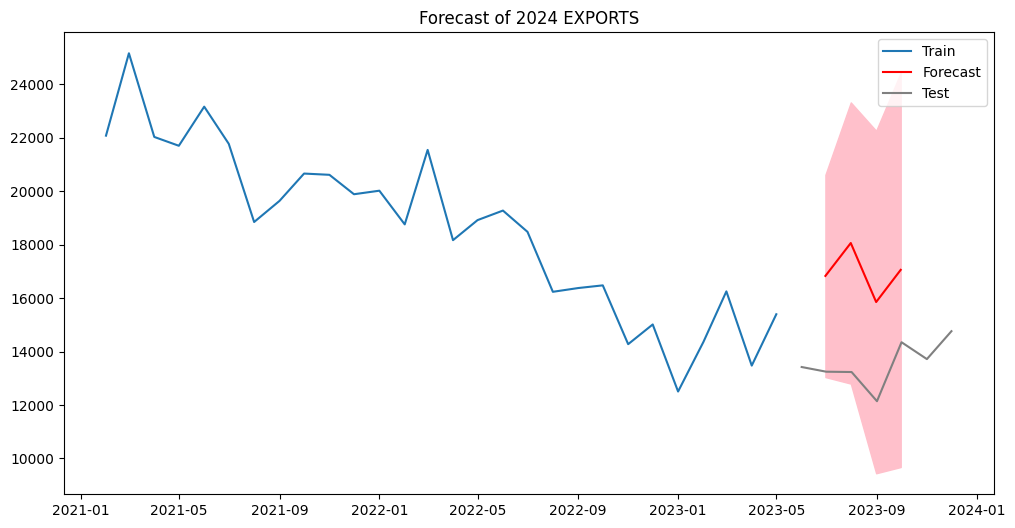

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 2: Load and Prepare Data
# Make sure 'Date' is a datetime column and set it as the index
exports_train_data['Year_Month'] = pd.to_datetime(exports_train_data['Year_Month'])
exports_train_data.set_index('Year_Month', inplace=True)
exports_test_data['Year_Month'] = pd.to_datetime(exports_test_data['Year_Month'])
exports_test_data.set_index('Year_Month', inplace=True)
df_monthly_exports_clean['Year_Month'] = pd.to_datetime(df_monthly_exports_clean['Year_Month'])
df_monthly_exports_clean.set_index('Year_Month', inplace=True)

# Step 3: Fit SARIMA Model
# Define the order and seasonal_order parameters
order = (1, 1, 0)
seasonal_order = (1, 1, 0, 4)
# Replace p, d, q, P, D, Q, and S with appropriate values

# Fit the SARIMA model
sarima_model = SARIMAX(exports_train_data['NumTrips'], order=order, seasonal_order=seasonal_order)
sarima_result = sarima_model.fit()

# Step 4: Model Diagnosis
# Print summary statistics and plot diagnostic plots
print(sarima_result.summary())
sarima_result.plot_diagnostics(figsize=(15, 12))
plt.show()

# Step 5: Forecasting
# Generate forecasts for future time periods
forecast_start_date = exports_train_data.index[-1] + pd.DateOffset(months=1)
forecast_end_date = forecast_start_date + pd.DateOffset(months=4)  # Replace 'n' with the number of forecast periods
forecast = sarima_result.get_forecast(steps=4)  # Replace 'n' with the number of forecast periods

# Extract forecast dates
forecast_dates = pd.date_range(start=exports_train_data.index[-1] + pd.DateOffset(months=1), periods=4, freq='M')

# Plot the forecasts
plt.figure(figsize=(12, 6))
plt.plot(exports_train_data.index, exports_train_data['NumTrips'], label='Train')
plt.plot(forecast_dates, forecast.predicted_mean, label='Forecast', color='red')
plt.plot(exports_test_data.index, exports_test_data['NumTrips'], label='Test', color='grey')
# plt.plot(df_monthly_exports_clean.index, df_monthly_exports_clean['NumTrips'], label='Test', color='green')
plt.fill_between(forecast_dates, forecast.conf_int()['lower NumTrips'], forecast.conf_int()['upper NumTrips'], color='pink')
plt.title('Forecast of 2024 EXPORTS')
plt.legend()
plt.show()

uncomment the #plt.plot(df_monthly_exports_clean.index, df_monthly_exports_clean['NumTrips'], label='Test', color='green') to preview the entirety of the observed data

The disjoint  between train and test data is because of different datasets. Although they are taken fro mthe same dataset and that the dataset is sequential, the last data point for training set is not the same as the first data point for testing set 

### Intepretation of Results

The exact quantity of exports is poorly forecasted but the test set is captured within the 95% confidence level of the forecast. 

The quartely forecast seems to predict the actual trend 2 months in advance. If we refer to the peaks in forecast graph, it is at 2023-08 and 2023-10 while the peaks in test data is at 2023-10 and 2023-12. After the 2 month translation to the right, the models trend prediction is consistent with the rest of the test data.

For what it is worth, this feature is consistent for the other forecasts as well.

## Forecasting Imports for 2024

In [25]:
df_monthly_imports = monthly_total_trips.groupby(['Year', 'Month', 'JOBTYPE']).sum().reset_index()

df_monthly_imports = df_monthly_imports[(df_monthly_imports['JOBTYPE'] == 'IMPORT')]

df_monthly_imports['NumTrips'] = pd.to_numeric(df_monthly_imports['NumTrips'])

df_monthly_imports.head()


,Year,Month,JOBTYPE,NumTrips,Year_Month
1,2021,1,IMPORT,4753,2021-1
4,2021,2,IMPORT,4436,2021-2
7,2021,3,IMPORT,5540,2021-3
10,2021,4,IMPORT,4764,2021-4
13,2021,5,IMPORT,5346,2021-5


## STL Decomposition

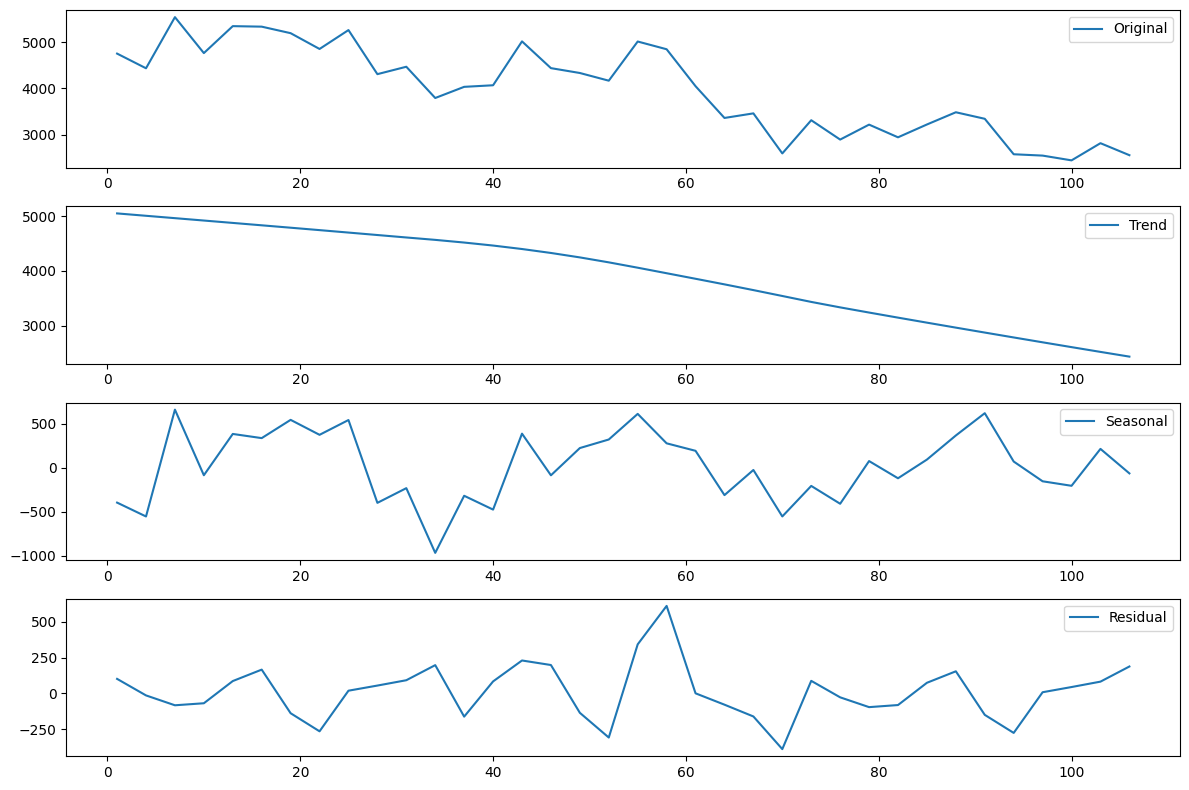

In [26]:
from statsmodels.tsa.seasonal import STL

# STL decomposition
stl = STL(df_monthly_imports['NumTrips'], period=12)  
result = stl.fit()

# Get decomposed components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Plot decomposed components
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df_monthly_imports['NumTrips'], label='Original')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()

We can see some seasonality in the export data. We will proceed with SARIMA for time series forecast methodology.

## SARIMA 

### Checking if data is stationary

A prerequisite for SARIMA modeeling is that the data must be stationary. As such, we begin checks using the Augmented Dickey- Fuller  (ADF) test

In [27]:
# using the ADF function created earlier

adfuller_test(df_monthly_imports['NumTrips'])

ADF Test Statistic : 0.3093786309861027
p-value : 0.9777707042840479
#Lags Used : 9
Number of Observations Used : 26
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### Differencing

Apply differencing to obtain a stationary dataset. We start differencing from the lowest order and stop when ADF indicates stationarity.

It is worthy to note that higher order differencing leads to larger data loss, we favour lower level differencing so as to preserve the already limited data.

In [28]:
df_monthly_imports['NumTrips First Difference'] = df_monthly_imports['NumTrips'] - df_monthly_imports['NumTrips'].shift(1)

In [29]:
df_monthly_imports['NumTrips'].shift(1)

1         NaN
4      4753.0
7      4436.0
10     5540.0
13     4764.0
16     5346.0
19     5335.0
22     5194.0
25     4853.0
28     5261.0
31     4309.0
34     4469.0
37     3794.0
40     4035.0
43     4069.0
46     5017.0
49     4439.0
52     4334.0
55     4168.0
58     5014.0
61     4847.0
64     4049.0
67     3363.0
70     3462.0
73     2597.0
76     3314.0
79     2896.0
82     3219.0
85     2945.0
88     3222.0
91     3486.0
94     3345.0
97     2579.0
100    2550.0
103    2447.0
106    2818.0
Name: NumTrips, dtype: float64

In [30]:
df_monthly_imports.head()

,Year,Month,JOBTYPE,NumTrips,Year_Month,NumTrips First Difference
1,2021,1,IMPORT,4753,2021-1,NaN
4,2021,2,IMPORT,4436,2021-2,-317.0
7,2021,3,IMPORT,5540,2021-3,1104.0
10,2021,4,IMPORT,4764,2021-4,-776.0
13,2021,5,IMPORT,5346,2021-5,582.0


In [31]:
## Again test dickey fuller test
adfuller_test(df_monthly_imports['NumTrips First Difference'].dropna())

ADF Test Statistic : -4.096738688828572
p-value : 0.000980616471889838
#Lags Used : 8
Number of Observations Used : 26
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


Data is now stationary and we can stop differentiating. The previous steps in taking the first difference has lead to the loss of 1 data point. The sample size is now n = 35.


Lets proceed to remove the invalid data to then obtain the clean dataset for SARIMA modelling.

Note that we have dropped the 2023-01 datapoint as a result of first differencing

Consequently, our first confirmed SARIMA parameter is d = 1

### SARIMA Parameters

SARIMA parameters include (p,d,q,s)


p: order of AR model


d: integration order of the process


q: order of MA model


s: seasonality


In [32]:
df_monthly_imports_clean=df_monthly_imports.dropna()
df_monthly_imports_clean.head()

,Year,Month,JOBTYPE,NumTrips,Year_Month,NumTrips First Difference
4,2021,2,IMPORT,4436,2021-2,-317.0
7,2021,3,IMPORT,5540,2021-3,1104.0
10,2021,4,IMPORT,4764,2021-4,-776.0
13,2021,5,IMPORT,5346,2021-5,582.0
16,2021,6,IMPORT,5335,2021-6,-11.0


### Plotting ACF and PACF to obtain parameters p and q respectively 

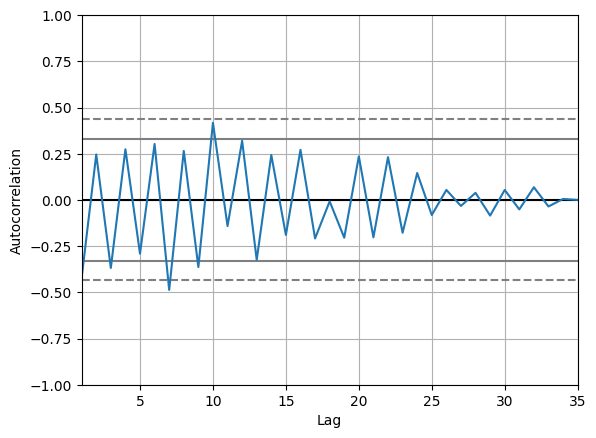

In [33]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_monthly_imports_clean['NumTrips First Difference'])
plt.show()

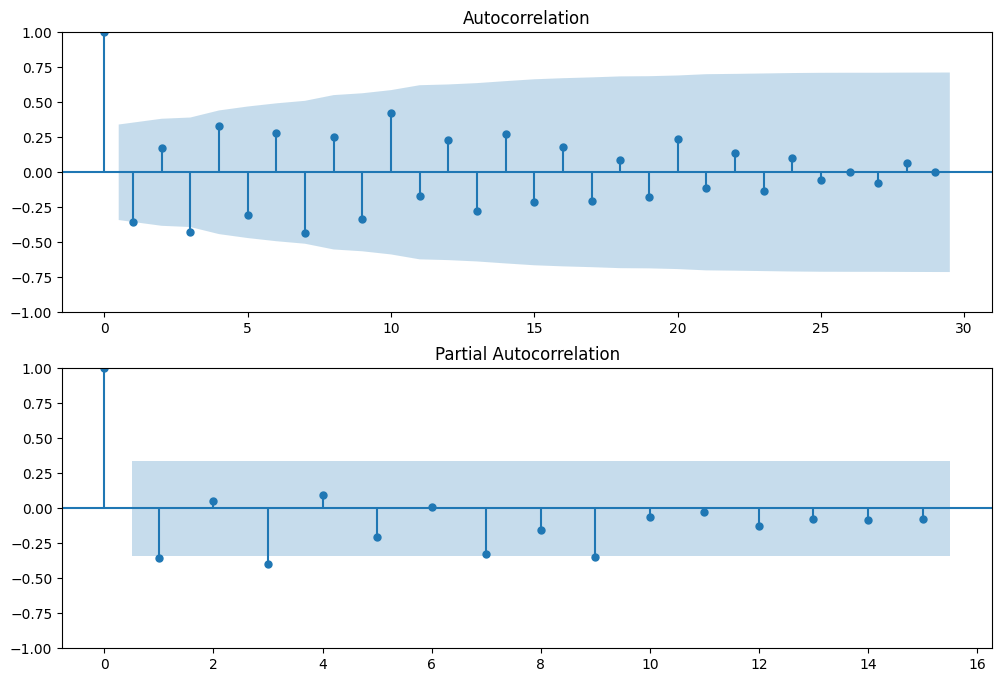

In [34]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_monthly_imports_clean['NumTrips First Difference'].iloc[2:],lags=29,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_monthly_imports_clean['NumTrips First Difference'].iloc[2:],lags=15,ax=ax2)

Intepreting ACF and PACF functions to obtain p and q parameters for SARIMA model.

Autocorrelation Function (ACF) 
- provides the order of the Auto-Regressive model, AR(p)
- There is high degree of autocorrelation between lag 1 and lag 2. AR(2) we obtain p = 2

Partial Autocorrelation Function (PACF) 
- provides the order of the Moving Average model, MA(q)
- q can either be 0 or 1
- we can iterate values for q for a better model

Hence we can use an AR(2) model to model this process.

Due to current limited sample size, we will predict quarterly exports instead of annual exports. seasonality s = 4

Initial parameters are confirmed as p=2, d=1, q=0 or 1, s=4

### Splitting into Training and Testing Data (80|20 split)

As Time Series forecasting is contextual. We will split the dataset by its recency.
 
The first 80% of the data will be used for training and more recent data will be set aside for testing.

In [35]:
n_rows = len(df_monthly_imports_clean)
split_index = int(np.floor(0.8 * n_rows))  # use floor to ensure we get 80% of the data

# Split dataframe into train and test data
imports_train_data = df_monthly_imports_clean.iloc[:split_index]
imports_test_data = df_monthly_imports_clean.iloc[split_index:]

In [36]:
imports_train_data.head()

,Year,Month,JOBTYPE,NumTrips,Year_Month,NumTrips First Difference
4,2021,2,IMPORT,4436,2021-2,-317.0
7,2021,3,IMPORT,5540,2021-3,1104.0
10,2021,4,IMPORT,4764,2021-4,-776.0
13,2021,5,IMPORT,5346,2021-5,582.0
16,2021,6,IMPORT,5335,2021-6,-11.0


In [37]:
imports_test_data.head()

,Year,Month,JOBTYPE,NumTrips,Year_Month,NumTrips First Difference
88,2023,6,IMPORT,3486,2023-6,264.0
91,2023,7,IMPORT,3345,2023-7,-141.0
94,2023,8,IMPORT,2579,2023-8,-766.0
97,2023,9,IMPORT,2550,2023-9,-29.0
100,2023,10,IMPORT,2447,2023-10,-103.0


## Plotting the forecast

In [38]:
df_monthly_imports_clean.head()

,Year,Month,JOBTYPE,NumTrips,Year_Month,NumTrips First Difference
4,2021,2,IMPORT,4436,2021-2,-317.0
7,2021,3,IMPORT,5540,2021-3,1104.0
10,2021,4,IMPORT,4764,2021-4,-776.0
13,2021,5,IMPORT,5346,2021-5,582.0
16,2021,6,IMPORT,5335,2021-6,-11.0


C:\Users\micha\AppData\Local\Temp\ipykernel_29744\3762598819.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imports_train_data['Year_Month'] = pd.to_datetime(imports_train_data['Year_Month'])
C:\Users\micha\AppData\Local\Temp\ipykernel_29744\3762598819.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imports_test_data['Year_Month'] = pd.to_datetime(imports_test_data['Year_Month'])
C:\Users\micha\AppData\Local\Temp\ipykernel_29744\3762598819.py:11: SettingWithCopyWarning: 
A value is trying to be set

C:\DBA_Test\Code\sutd_eda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:                          NumTrips   No. Observations:                   28
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                -174.884
Date:                           Tue, 16 Apr 2024   AIC                            359.768
Time:                                   16:10:50   BIC                            365.445
Sample:                               02-01-2021   HQIC                           361.196
                                    - 05-01-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4702      0.302     -1.557      0.119      -1.062       0.122
ma.L1          0.9970     12.528      0.080

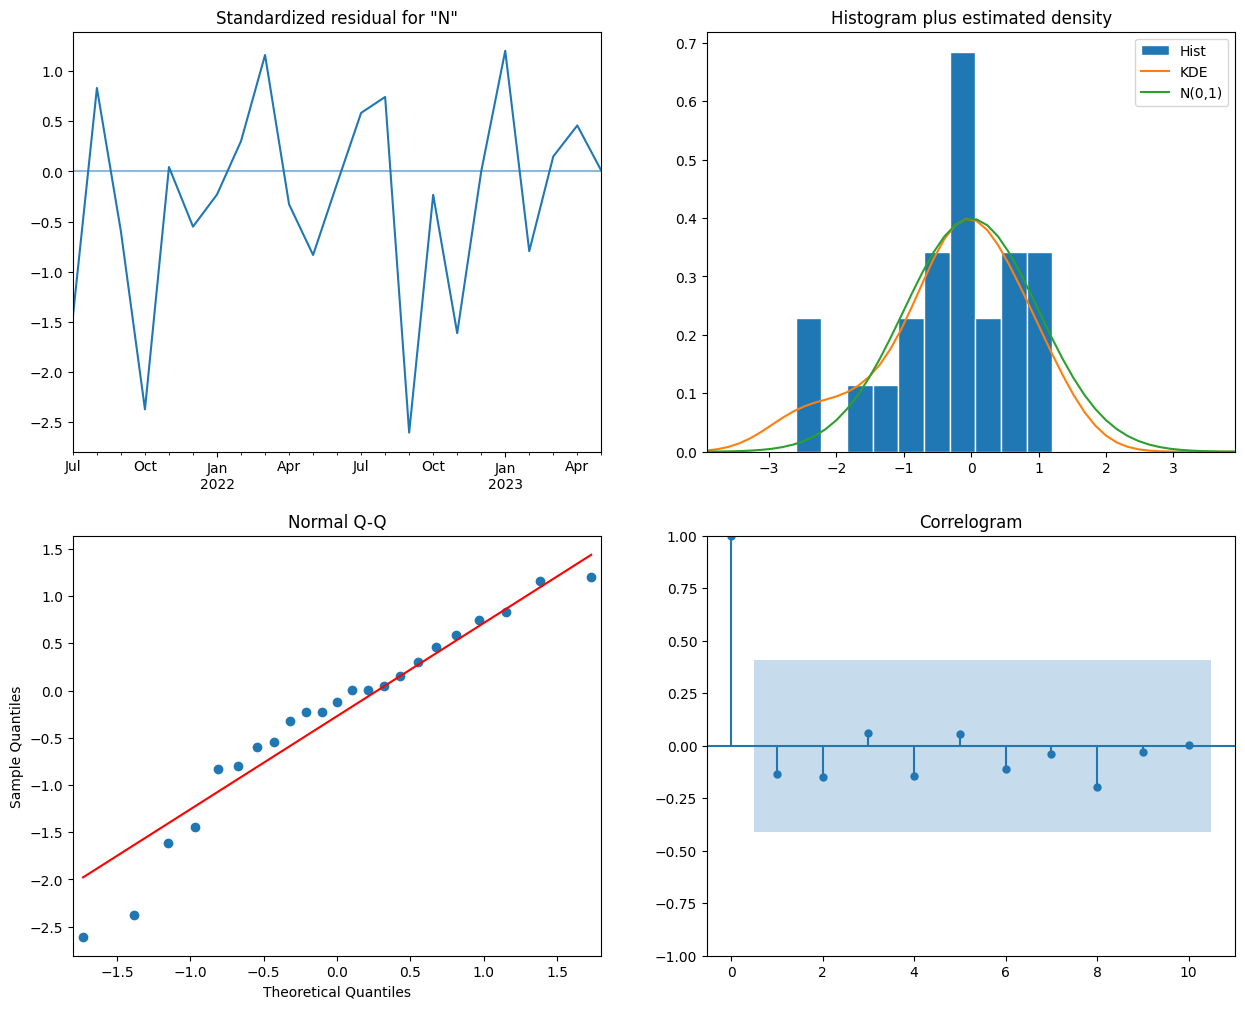

C:\Users\micha\AppData\Local\Temp\ipykernel_29744\3762598819.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=imports_train_data.index[-1] + pd.DateOffset(months=1), periods=4, freq='M')


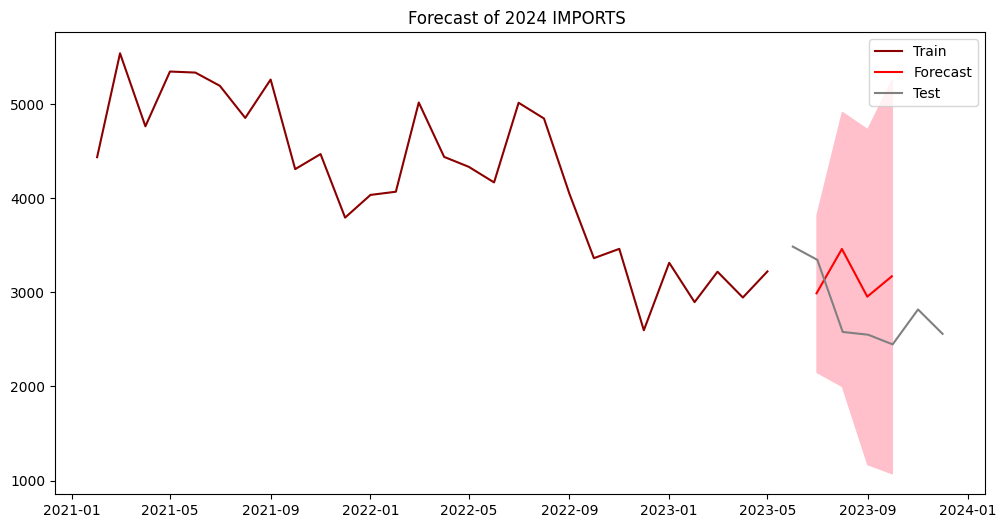

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 2: Load and Prepare Data
# Make sure 'Date' is a datetime column and set it as the index
imports_train_data['Year_Month'] = pd.to_datetime(imports_train_data['Year_Month'])
imports_train_data.set_index('Year_Month', inplace=True)
imports_test_data['Year_Month'] = pd.to_datetime(imports_test_data['Year_Month'])
imports_test_data.set_index('Year_Month', inplace=True)
df_monthly_imports_clean['Year_Month'] = pd.to_datetime(df_monthly_imports_clean['Year_Month'])
df_monthly_imports_clean.set_index('Year_Month', inplace=True)

# Step 3: Fit SARIMA Model
# Define the order and seasonal_order parameters
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 4)
# Replace p, d, q, P, D, Q, and S with appropriate values

# Fit the SARIMA model
sarima_model = SARIMAX(imports_train_data['NumTrips'], order=order, seasonal_order=seasonal_order)
sarima_result = sarima_model.fit()

# Step 4: Model Diagnosis
# Print summary statistics and plot diagnostic plots
print(sarima_result.summary())
sarima_result.plot_diagnostics(figsize=(15, 12))
plt.show()

# Step 5: Forecasting
# Generate forecasts for future time periods
forecast_start_date = imports_train_data.index[-1] + pd.DateOffset(months=1)
forecast_end_date = forecast_start_date + pd.DateOffset(months=4)  # Replace 'n' with the number of forecast periods
forecast = sarima_result.get_forecast(steps=4)  # Replace 'n' with the number of forecast periods

# Extract forecast dates
forecast_dates = pd.date_range(start=imports_train_data.index[-1] + pd.DateOffset(months=1), periods=4, freq='M')

# Plot the forecasts
plt.figure(figsize=(12, 6))
plt.plot(imports_train_data.index, imports_train_data['NumTrips'], label='Train', color='darkred')
plt.plot(forecast_dates, forecast.predicted_mean, label='Forecast', color='red')
plt.plot(imports_test_data.index, imports_test_data['NumTrips'], label='Test', color='grey')
# plt.plot(df_monthly_exports_clean.index, df_monthly_exports_clean['NumTrips'], label='Test', color='green')
plt.fill_between(forecast_dates, forecast.conf_int()['lower NumTrips'], forecast.conf_int()['upper NumTrips'], color='pink')
plt.title('Forecast of 2024 IMPORTS ')
plt.legend()
plt.show()


uncomment the #plt.plot(df_monthly_imports_clean.index, df_monthly_imports_clean['NumTrips'], label='Test', color='green') to preview the entirety of the observed data

The disjoint  between train and test data is because of different datasets. Although they are taken fro mthe same dataset and that the dataset is sequential, the last data point for training set is not the same as the first data point for testing set 

### Intepretation of Results

The exact quantity of exports is poorly forecasted but much closer to the test set and the test set is captured within the 95% confidence level of the forecast. 

The quartely forecast seems to predict the actual trend 3 months in advance. If we refer to the peak in forecast graph, it is at 2023-07 and 2023-10 while the peaks in test data is at 2023-11, the subsequent trend follows for the rest of the test data. By extension, our model is predicting a upward trend for in 2024-01. 

For what it is worth, this forward prediction feature is consistent for the other forecasts as well.

## Forecasting Local for 2024

In [40]:
df_monthly_local = monthly_total_trips.groupby(['Year', 'Month', 'JOBTYPE']).sum().reset_index()

df_monthly_local = df_monthly_local[(df_monthly_local['JOBTYPE'] == 'LOCAL')]

df_monthly_local['NumTrips'] = pd.to_numeric(df_monthly_local['NumTrips'])

In [41]:
df_monthly_local.head()

,Year,Month,JOBTYPE,NumTrips,Year_Month
2,2021,1,LOCAL,9415,2021-1
5,2021,2,LOCAL,8476,2021-2
8,2021,3,LOCAL,9345,2021-3
11,2021,4,LOCAL,8856,2021-4
14,2021,5,LOCAL,8174,2021-5


## STL Decomposition

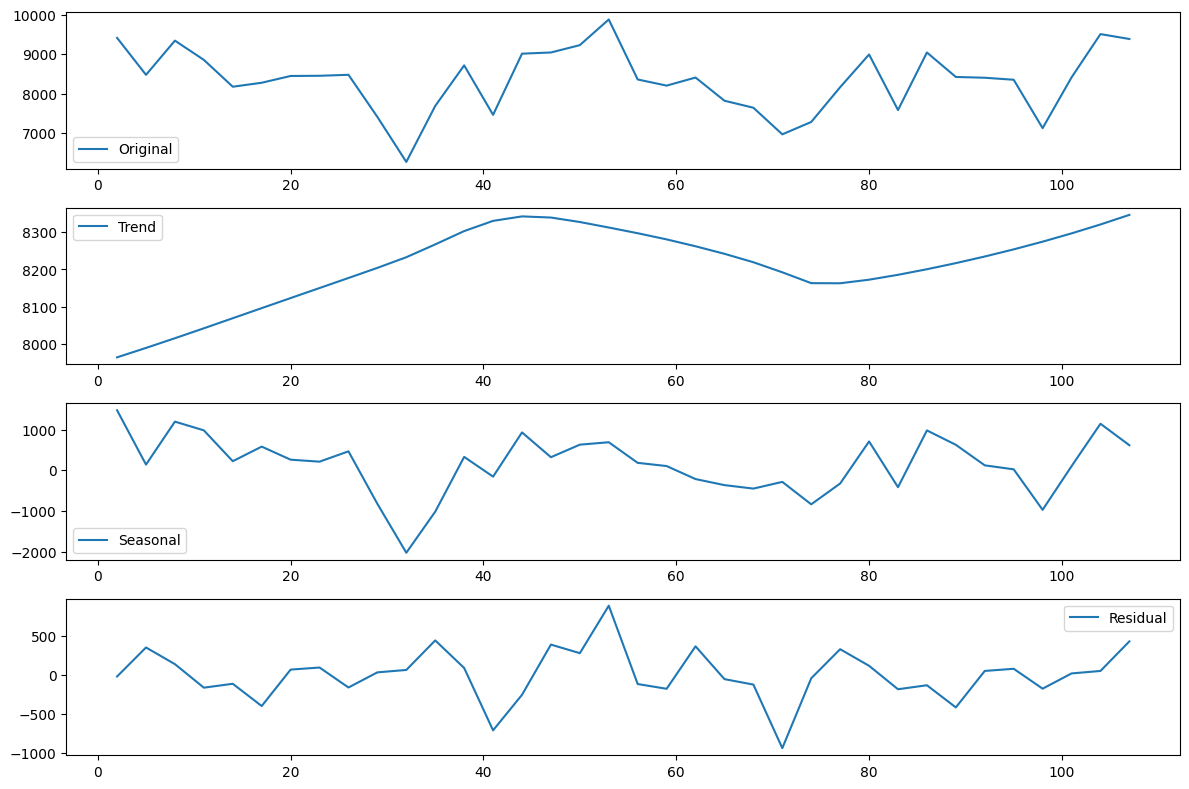

In [42]:
from statsmodels.tsa.seasonal import STL

# STL decomposition
stl = STL(df_monthly_local['NumTrips'], period=12)  
result = stl.fit()

# Get decomposed components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Plot decomposed components
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df_monthly_local['NumTrips'], label='Original')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()

We can see some seasonality in the export data. We will proceed with SARIMA for time series forecast methodology.

## SARIMA 

### Checking if data is stationary

In [43]:
# using the ADF function created earlier

adfuller_test(df_monthly_local['NumTrips'])

ADF Test Statistic : -2.35360216632412
p-value : 0.15526215342879124
#Lags Used : 10
Number of Observations Used : 25
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### Differencing

Apply differencing to obtain a stationary dataset. We start differencing from the lowest order and stop when ADF indicates stationarity.


It is worthy to note that higher order differencing leads to larger data loss, we favour lower level differencing so as to preserve the already limited data.

In [44]:
df_monthly_local['NumTrips First Difference'] = df_monthly_local['NumTrips'] - df_monthly_local['NumTrips'].shift(1)

In [45]:
df_monthly_local['NumTrips'].shift(1)

2         NaN
5      9415.0
8      8476.0
11     9345.0
14     8856.0
17     8174.0
20     8275.0
23     8447.0
26     8452.0
29     8477.0
32     7406.0
35     6263.0
38     7686.0
41     8716.0
44     7459.0
47     9014.0
50     9044.0
53     9231.0
56     9883.0
59     8358.0
62     8202.0
65     8407.0
68     7818.0
71     7640.0
74     6964.0
77     7278.0
80     8162.0
83     8993.0
86     7581.0
89     9044.0
92     8422.0
95     8402.0
98     8351.0
101    7121.0
104    8411.0
107    9511.0
Name: NumTrips, dtype: float64

In [46]:
df_monthly_local.head()

,Year,Month,JOBTYPE,NumTrips,Year_Month,NumTrips First Difference
2,2021,1,LOCAL,9415,2021-1,NaN
5,2021,2,LOCAL,8476,2021-2,-939.0
8,2021,3,LOCAL,9345,2021-3,869.0
11,2021,4,LOCAL,8856,2021-4,-489.0
14,2021,5,LOCAL,8174,2021-5,-682.0


In [47]:
## Again test dickey fuller test
adfuller_test(df_monthly_local['NumTrips First Difference'].dropna())

ADF Test Statistic : -3.3540330131169873
p-value : 0.012629326258544418
#Lags Used : 7
Number of Observations Used : 27
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


Data is now stationary and we can stop differentiating. The previous steps in taking the first difference has lead to the loss of 1 data point. The sample size is now n = 35.


Lets proceed to remove the invalid data to then obtain the clean dataset for SARIMA modelling.


Note that we have dropped the 2023-01 datapoint as a result of first differencing

Consequently, our first confirmed SARIMA parameter is d = 1


In [48]:
df_monthly_local_clean=df_monthly_local.dropna()
df_monthly_local_clean.head()

,Year,Month,JOBTYPE,NumTrips,Year_Month,NumTrips First Difference
5,2021,2,LOCAL,8476,2021-2,-939.0
8,2021,3,LOCAL,9345,2021-3,869.0
11,2021,4,LOCAL,8856,2021-4,-489.0
14,2021,5,LOCAL,8174,2021-5,-682.0
17,2021,6,LOCAL,8275,2021-6,101.0


### SARIMA parameters

SARIMA parameters include (p,d,q,s)


p: order of AR model


d: integration order of the process


q: order of MA model


s: seasonality


### Plotting ACF and PACF to obtain parameters p and q respectively

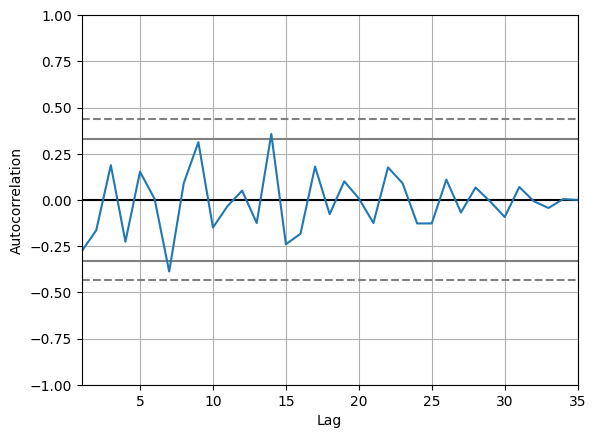

In [49]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_monthly_local_clean['NumTrips First Difference'])
plt.show()

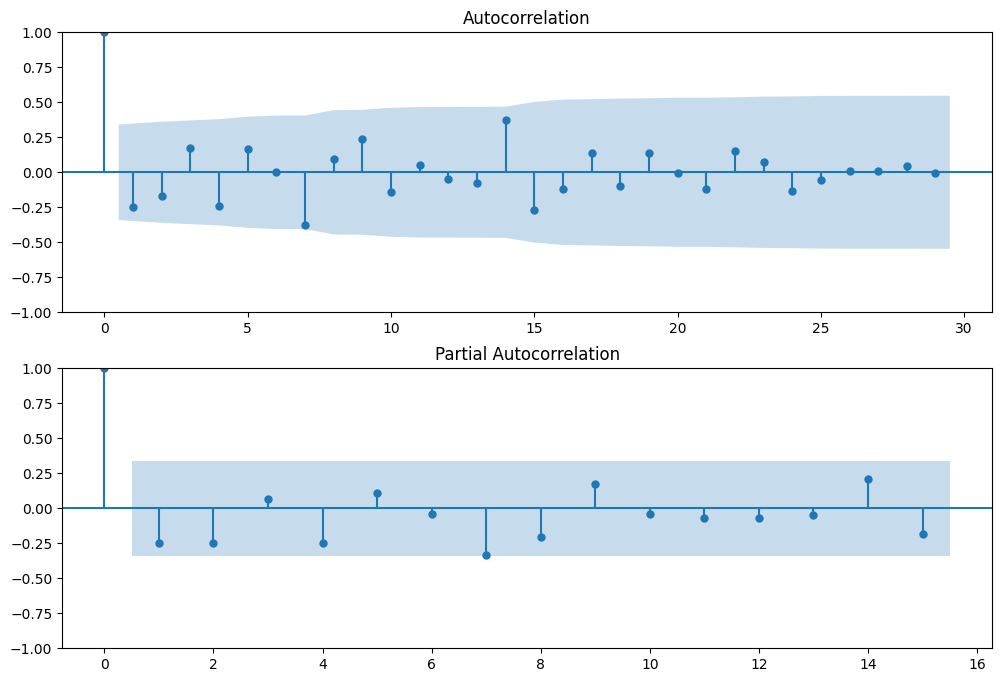

In [50]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_monthly_local_clean['NumTrips First Difference'].iloc[2:],lags=29,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_monthly_local_clean['NumTrips First Difference'].iloc[2:],lags=15,ax=ax2)

Autocorrelation Function (ACF)
- provides the order of the Auto-Regressive model, AR(p)
- Tails off (Geometric decay)


Partial Autocorrelation Function (PACF)
- provides the order of the Moving Average model, MA(q)
- Tails off (Geometric decay)

Hence we can use an ARMA(p,q) model to model this process. However, modelling white noise is difficult because we cannot retrieve any parameters from the ACF and PACF plots.

Due to current limited sample size, we will predict quarterly exports instead of annual exports. seasonality s = 4


Initial parameters are confirmed as p= 0, d=1, q=0, s=4


### Splitting into Training and Testing Data (80|20 split)

As Time Series forecasting is contextual. We will split the dataset by its recency.

The first 80% of the data will be used for training and more recent 20% data will be set aside for testing.


In [51]:
n_rows = len(df_monthly_local_clean)
split_index = int(np.floor(0.8 * n_rows))  # use floor to ensure we get 80% of the data

# Split dataframe into train and test data
local_train_data = df_monthly_local_clean.iloc[:split_index]
local_test_data = df_monthly_local_clean.iloc[split_index:]

In [52]:
local_train_data.head()

,Year,Month,JOBTYPE,NumTrips,Year_Month,NumTrips First Difference
5,2021,2,LOCAL,8476,2021-2,-939.0
8,2021,3,LOCAL,9345,2021-3,869.0
11,2021,4,LOCAL,8856,2021-4,-489.0
14,2021,5,LOCAL,8174,2021-5,-682.0
17,2021,6,LOCAL,8275,2021-6,101.0


In [53]:
local_test_data.head()

,Year,Month,JOBTYPE,NumTrips,Year_Month,NumTrips First Difference
89,2023,6,LOCAL,8422,2023-6,-622.0
92,2023,7,LOCAL,8402,2023-7,-20.0
95,2023,8,LOCAL,8351,2023-8,-51.0
98,2023,9,LOCAL,7121,2023-9,-1230.0
101,2023,10,LOCAL,8411,2023-10,1290.0


### Plotting the forecast

In [54]:
df_monthly_local_clean.head()

,Year,Month,JOBTYPE,NumTrips,Year_Month,NumTrips First Difference
5,2021,2,LOCAL,8476,2021-2,-939.0
8,2021,3,LOCAL,9345,2021-3,869.0
11,2021,4,LOCAL,8856,2021-4,-489.0
14,2021,5,LOCAL,8174,2021-5,-682.0
17,2021,6,LOCAL,8275,2021-6,101.0


C:\Users\micha\AppData\Local\Temp\ipykernel_29744\1667075442.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  local_train_data['Year_Month'] = pd.to_datetime(local_train_data['Year_Month'])
C:\Users\micha\AppData\Local\Temp\ipykernel_29744\1667075442.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  local_test_data['Year_Month'] = pd.to_datetime(local_test_data['Year_Month'])
C:\Users\micha\AppData\Local\Temp\ipykernel_29744\1667075442.py:11: SettingWithCopyWarning: 
A value is trying to be set on a co

                                     SARIMAX Results                                     
Dep. Variable:                          NumTrips   No. Observations:                   28
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 4)   Log Likelihood                -197.637
Date:                           Tue, 16 Apr 2024   AIC                            397.274
Time:                                   16:10:52   BIC                            398.410
Sample:                               02-01-2021   HQIC                           397.560
                                    - 05-01-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.693e+06   5.28e+05      3.206      0.001    6.58e+05    2.73e+06
Ljung-Box (L1) (Q):                   2.66 

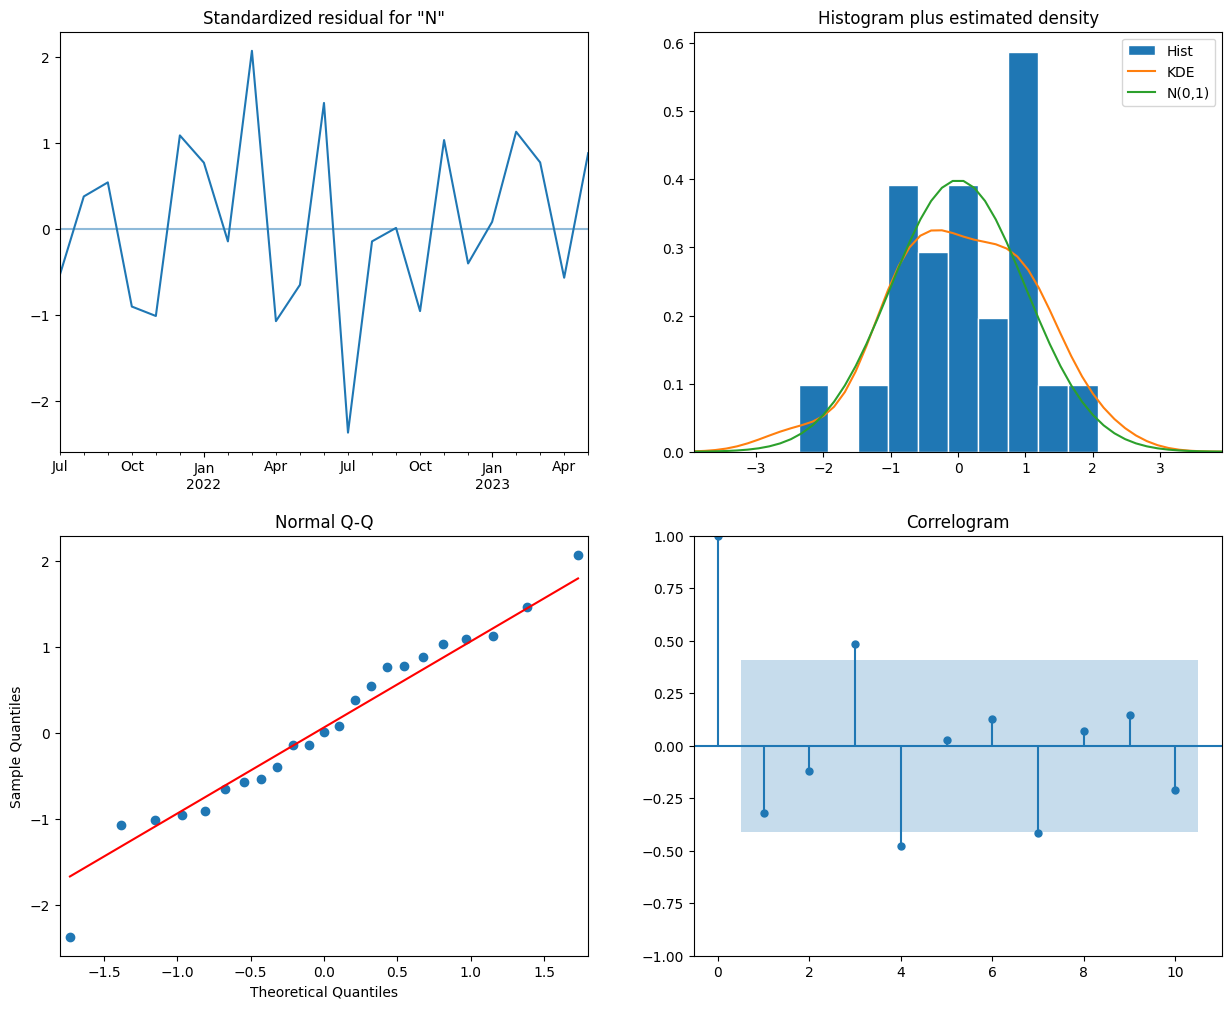

C:\Users\micha\AppData\Local\Temp\ipykernel_29744\1667075442.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=local_train_data.index[-1] + pd.DateOffset(months=1), periods=4, freq='M')


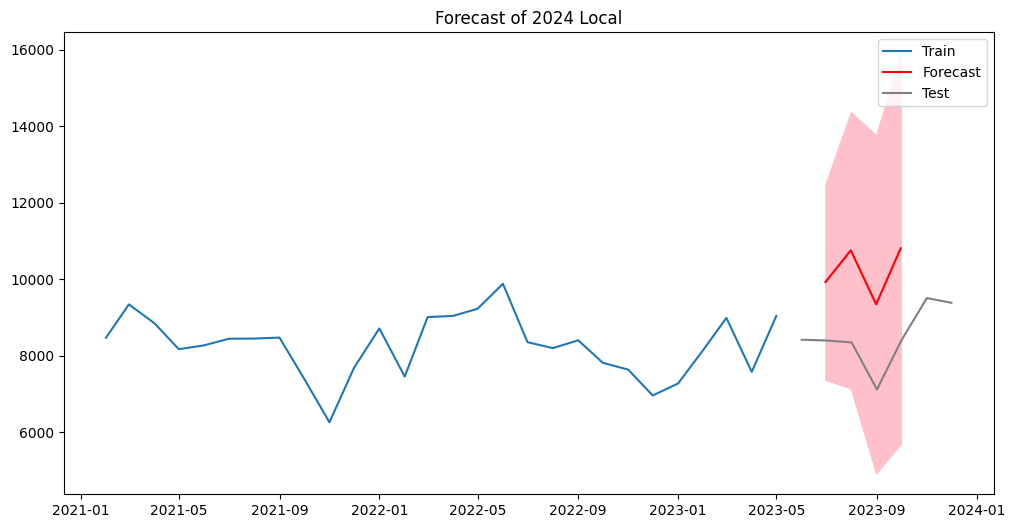

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 2: Load and Prepare Data
# Make sure 'Date' is a datetime column and set it as the index
local_train_data['Year_Month'] = pd.to_datetime(local_train_data['Year_Month'])
local_train_data.set_index('Year_Month', inplace=True)
local_test_data['Year_Month'] = pd.to_datetime(local_test_data['Year_Month'])
local_test_data.set_index('Year_Month', inplace=True)
df_monthly_local_clean['Year_Month'] = pd.to_datetime(df_monthly_local_clean['Year_Month'])
df_monthly_local_clean.set_index('Year_Month', inplace=True)

# Step 3: Fit SARIMA Model
# Define the order and seasonal_order parameters
order = (0, 1, 0)
seasonal_order = (0, 1, 0, 4)
# Replace p, d, q, P, D, Q, and S with appropriate values

# Fit the SARIMA model
sarima_model = SARIMAX(local_train_data['NumTrips'], order=order, seasonal_order=seasonal_order)
sarima_result = sarima_model.fit()

# Step 4: Model Diagnosis 
# Print summary statistics and plot diagnostic plots
print(sarima_result.summary())
sarima_result.plot_diagnostics(figsize=(15, 12))
plt.show()

# Step 5: Forecasting
# Generate forecasts for future time periods
forecast_start_date = local_train_data.index[-1] + pd.DateOffset(months=1)
forecast_end_date = forecast_start_date + pd.DateOffset(months=4)  # Replace 'n' with the number of forecast periods
forecast = sarima_result.get_forecast(steps=4)  # Replace 'n' with the number of forecast periods

# Extract forecast dates
forecast_dates = pd.date_range(start=local_train_data.index[-1] + pd.DateOffset(months=1), periods=4, freq='M')

# Plot the forecasts
plt.figure(figsize=(12, 6))
plt.plot(local_train_data.index, local_train_data['NumTrips'], label='Train')
plt.plot(forecast_dates, forecast.predicted_mean, label='Forecast', color='red')
plt.plot(local_test_data.index, local_test_data['NumTrips'], label='Test', color='grey')
# plt.plot(df_monthly_exports_clean.index, df_monthly_exports_clean['NumTrips'], label='Test', color='green')
plt.fill_between(forecast_dates, forecast.conf_int()['lower NumTrips'], forecast.conf_int()['upper NumTrips'], color='pink')
plt.title('Forecast of 2024 Local')
plt.legend()
plt.show()


uncomment the #plt.plot(df_monthly_local_clean.index, df_monthly_local_clean['NumTrips'], label='Test', color='green') to preview the entirety of the observed data

The disjoint  between train and test data is because of different datasets. Although they are taken fro mthe same dataset and that the dataset is sequential, the last data point for training set is not the same as the first data point for testing set 

### Intepretation of Results

The exact quantity of exports is poorly forecasted but much closer to the test set and the test set is captured within the 95% confidence level of the forecast. 

The quartely forecast seems to predict the actual trend 3 months in advance. If we refer to the peak in forecast graph, it is at 2023-07 and 2023-10 while the peaks in test data is at 2023-11. After translation, the subsequent trend follows for the rest of the test data and is almost a 1-to-1 match in terms of exact quantity. By extension, our model is predicting a upward trend for in 2024-01. 

For what it is worth, this forward prediction feature is consistent for the other forecasts as well.

# MISC

parameters for daily trend analysis are not a 1-1 swap for monthly trend analysis

The team has chosen to do monthly trend analysis due to several other reasons
1. Parameter tuning for daily trend analysis generally took too long to be optimised and the results were not very good, hence favour monthly. 

2. Time constraints limited our parameter tuning process for daily trend analysis. To speed up the process we have employed alternative methods such as gridsearch but it took 660 minutes to generate one set of ideal parameters for a range of best guesses. 

3. Trail and error approach for daily was too hit and miss. The likely set of ideal parameters would be a combination of larger numbers, we know this because of our initial predcitions for the ACF and PACF. It is worthy to note that larger numbers can lead to the risk of over fitting.

In the interest of feasibility in conducting a times series analysis, we have decided on a monthly forecast. 